# Notebook 7: Discrete Random Variables and Distributions 
***

In this notebook we'll get some more practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients.  

In [1]:
import numpy as np
from math import factorial
import matplotlib.pylab as plt 
from scipy.special import binom
import itertools
%matplotlib inline

### Exercise 1 - Loaded Dice 
*** 

Consider a loaded six-sided die.  

**Part A**: Suppose that the die is loaded such that you are twice as likely to roll either a $1$, $2$, or $3$, than you are to roll either a $4$, $5$, or $6$. Let $X$ be a random variable describing the die.  What is the probability mass function for $X$? 

PMF

|a=|1|2|3|4|5|6|
|------|------|------|------|------|------|------|
|P(X=a)=p(a)    |2/9    |2/9   |2/9    |1/9    |1/9    |1/9    |

**Part B**: Find the cumulative distribution function for $X$.  What is the probability that you roll a $4$ or lower with the loaded die? 

CDF

|a=|1|2|3|4|5|6|
|------|------|------|------|------|------|------|
|F(a)    |2/9    |4/9   |6/9    |7/9    |8/9    |9/9    |

### Exercise 2 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a function that takes in the parameters of the binomial distribution, $n$ and $p$, and returns the probability mass function as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).  

In [10]:
def binomial_pmf(n, p):

    pmf = np.array([binom(n,k)*(p**k)*(1-p)**(n-k) for k in range(0,n+1)])
    return pmf

pmf = binomial_pmf(10,.5)

for k, prob in enumerate(pmf):
    print("{} | {:0.4f}".format(k,prob))

# Here is a check that your binomial_pmf function at least sums to 1
assert np.sum(pmf)==1, "Error: pmf does not add up to 1"


0 | 0.0010
1 | 0.0098
2 | 0.0439
3 | 0.1172
4 | 0.2051
5 | 0.2461
6 | 0.2051
7 | 0.1172
8 | 0.0439
9 | 0.0098
10 | 0.0010


Row 2 is basically calculating 

$$({10}over{2})(1/2)^2(1/2)^9 $$

**Part B**: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  You can do that with Numpy's [binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. Read the documentation, and then try drawing 20 samples from _Bin(n,p)_ for $n=10$ and $p=0.25$.  

In [14]:
# numpy.random.binomial(n, p, size=None)

#flipping biased coin 10 times where prob(T)=0.25
# we want to see how many times we get a tail in 10 flips
# size=20 means it runs the experiment 20 times 
# (each experiment flips the coin 10 times )
samples = np.random.binomial(10,0.25,size=20) 
print(samples)

#so we are getting # of tails in each experiment 

[4 2 1 2 3 1 2 3 5 4 5 2 4 3 4 1 4 3 0 3]


**Part C**: We can approximate the pmf of _Bin(n,p)_ by drawing many many samples from the distribution and plotting a **density** histogram.  Do this now.  Additionally, use the function you wrote in **Part A** to get the exact density, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

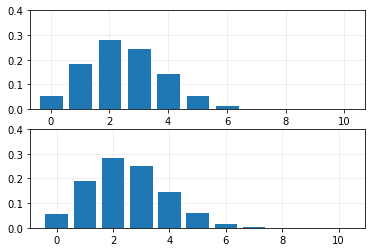

In [17]:
n = 10 #flip biased coin 10 times
p = 0.25 #prob of getting Tails

 #size is number of experiments we are running
sample = np.random.binomial(n=n, p=p, size=100000)
bins = np.arange(-0.5, 11.5, 1)

X = np.array(range(n+1))
pmf = binomial_pmf(n=10, p=0.25)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].hist(sample, edgecolor='white', density=True, bins=bins, rwidth=0.8)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([-0.7, 10.7]);
ax[0].set_ylim([0, 0.4])

ax[1].set_ylim([0, 0.4])
ax[1].bar(X, pmf)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);

#showing that its super likely to roll 1 2 or 3 tails 
#but hardly ever/never get 10 tails in all 10 flipps since coin is biased

### Exercise 3 - Predicting Play-off Winners 
***

In this exercise we'll look at the probability of your favorite sports team winning a best-of-7 play-off series. Suppose your team is the slight favorite in the series and in each individual game has a probability of winning of $p = 0.55$. 

**Part A**: What is the probability that your team wins the series? 

**Part B**: How often will an underdog with a winning probability of 45% win a best-of-7 series?  Is this underdog more likely to win a series if it's shorter, say best-of-5 or best-of-3? 

This example is not particularly realistic because it does not consider home-field advantage.  Typically teams will play better (and thus have a higher probability of winning) when they play at their home field.  Suppose that your team hosts Games 1, 2, 6, and 7 at home, and plays away in Games 3, 4, and 5.  Suppose that when your team plays at home, they win with probability $p = 0.6$ and when they're on the road they win with only probability $q=0.5$.  

**Part C**: Is the probability that your team wins $k$ of the $n$ games still well-described by a binomial distribution?  Why or why not?  You might consider reading [this article](https://fivethirtyeight.com/features/why-cant-the-rockies-hit-outside-the-rockies/) for some inspiration, especially if you are a Rockies fan!

Parts D & E are optional. If you are interested in a more serious determination of winning a series, then try out parts D and E below. These concepts will not be assessed.

**Part D**: What is the probability that your team wins the 7-game series under the above conditions?

The best way to tackle this problem is probably to work out a few smaller probabilities by hand, and then write some code to calculate the probabilities in general.  Also, you may find the `itertools` package useful, specifically the [`itertools.combinations` method](https://docs.python.org/3/library/itertools.html#itertools.combinations).

Some starter code for you to play around with and potentially incorporate into a function is given below.  The call to `itertools.combinations` below iterates the tuple `combo` over all possible combinations of 3 elements out of the list (or array-like object) in the first argument. In this case, that is the first 5 non-negative integers (`range(5)`).

In [ ]:
# starter code you can play with to see how it works, then hopefully integrate into a function
for combo in itertools.combinations(range(5), 3):
    print(combo)

**Part E**: Now suppose that the teams are evenly matched in the sense that your team wins with probability $p=0.55$ when playing at home and wins with only probability $q = (1-p) = 0.45$ when playing away.  How much of a difference does home-field advantage make? 